### Anti Money Laundering.
- The task is to classify whether the given transaction is Normal or Fraud. This is the binary classifcation problem. We use multiple machine learning models to solve this problem and do the comparison to check which model performs better on th basis of multiple performance metrics.
- The datase can is downloaded from kaggle. https://www.kaggle.com/datasets/aitude/ctgan-synthetic-credit-card-fraud-dataset


# Import the packages
- Importing the python packages to perform the operations on data. For example sklearn is used for machine learning models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Loading the Dataset

In [2]:
# load the dataset
df = pd.read_csv("new_data.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131196.0,-1.829267,-4.014357,-3.500898,4.132251,-0.184280,-4.549442,-1.763961,0.581823,-1.333723,...,1.426045,-0.674371,0.405865,0.233265,-0.677015,0.113999,0.193479,0.147068,7.39,1
1,128997.0,1.275073,-0.811653,-2.077238,0.391131,0.617316,-1.100701,0.058033,-0.195165,0.827303,...,-0.405946,-0.949178,0.063598,-0.454418,0.008721,-0.235292,-0.140436,-0.083795,548.18,1
2,23228.0,-6.486806,12.316680,-0.159296,-1.476325,-10.551318,-3.196821,-2.080644,-0.827171,-7.218656,...,0.888168,2.096058,2.448951,-1.100272,-1.731948,-0.056348,-0.793049,-0.760746,0.00,1
3,168479.0,-0.620168,0.179171,0.051435,-0.549703,0.466674,-0.853331,0.158395,-0.086357,-0.653450,...,-0.405259,-0.024038,0.355619,0.494179,-0.364062,0.691354,-0.485278,0.115025,102.78,0
4,47788.0,1.226141,0.685769,-3.269819,4.044547,5.398091,-1.625797,0.566105,0.430564,-0.616791,...,-0.154688,-0.763524,-0.130603,-1.026025,1.756225,0.803660,0.350295,0.285944,6.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,39670.0,1.490330,-0.042431,1.191476,-1.274813,0.489518,-0.780789,-1.231983,0.498324,2.721250,...,-0.377000,-0.853915,0.435942,0.537248,-0.248402,-0.698768,0.038355,-0.088570,0.66,0
284803,124333.0,-2.755178,3.527597,-7.472649,-0.643247,0.303583,-3.387946,-1.788658,0.104390,-2.394616,...,1.539279,0.482541,0.352511,-0.331249,0.252620,0.679848,0.038666,-0.010905,43.35,1
284804,90263.0,-0.680626,2.221389,-2.938103,3.910116,0.992276,-0.618069,-2.415077,-0.313998,-1.964356,...,-0.106828,-0.583329,-0.420721,-0.194709,0.245907,0.663649,0.352560,0.461122,0.76,1
284805,7116.0,-12.595775,5.049049,-0.808664,5.431214,-8.051008,-6.410953,-11.286683,10.708340,-4.838811,...,3.452754,0.001036,-1.316678,0.537941,0.841726,0.779193,0.097956,-0.083458,49.99,1


# Data Analysis

In [3]:
print("The dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contains 284807 rows and 31 columns


In [4]:
# check some basic stats of dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,90612.899988,-1.231740,1.427346,-1.400495,1.666286,-1.044619,-0.706651,-1.348656,0.203586,-0.932437,...,0.457746,0.073594,0.084949,0.030677,0.069420,0.007219,0.087473,0.034508,96.094714,0.552244
std,47249.332265,3.675312,2.829019,2.676741,2.687045,3.162108,1.736378,2.856984,2.459683,1.990228,...,1.844141,0.878541,0.678345,0.574966,0.632164,0.482730,0.782960,0.361277,199.829114,0.497264
min,0.000000,-18.336919,-18.544554,-9.154794,-5.683171,-18.998640,-7.948529,-11.413642,-12.420579,-9.404776,...,-15.337072,-8.136080,-5.580203,-2.079315,-4.604512,-1.744495,-4.989467,-2.557544,0.000000,0.000000
25%,50520.000000,-1.919930,-0.121423,-2.930170,-0.307914,-1.324306,-1.232124,-1.882710,-0.238265,-1.616980,...,-0.185141,-0.541150,-0.153052,-0.347265,-0.316281,-0.323606,-0.081243,-0.070265,4.150000,0.000000
50%,82091.000000,-0.422970,0.602685,-0.733580,0.968860,-0.394581,-0.611581,-0.388360,0.090593,-0.533084,...,0.085322,0.116023,0.008502,0.063463,0.068936,-0.060122,0.018283,0.023510,21.030000,1.000000
75%,136572.000000,1.164033,2.170688,0.593717,3.391439,0.477143,0.004476,0.306388,0.577302,0.240282,...,0.460937,0.630634,0.195974,0.477340,0.469275,0.281239,0.304141,0.180580,91.980000,1.000000
max,172792.000000,2.454087,13.508542,3.923432,15.160001,9.872112,7.312835,11.435091,12.741546,8.904668,...,18.887294,7.924848,9.201686,1.277876,4.923670,3.517346,3.730047,1.999286,1638.150000,1.000000


In [5]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check for missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Observations 
- There is no missing values in the dataset.

In [7]:
# drop the useless columns that have unique values and not be used in our analysis
df = df.drop(["Time"],axis=1)

1    157283
0    127524
Name: Class, dtype: int64


<AxesSubplot:>

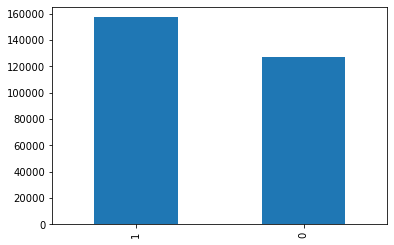

In [8]:
# analyzing the class variable
print(df["Class"].value_counts())
df["Class"].value_counts().plot.bar()

#### Observations:
- The dataset is imbalanced.

### DATA ANALYSIS

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

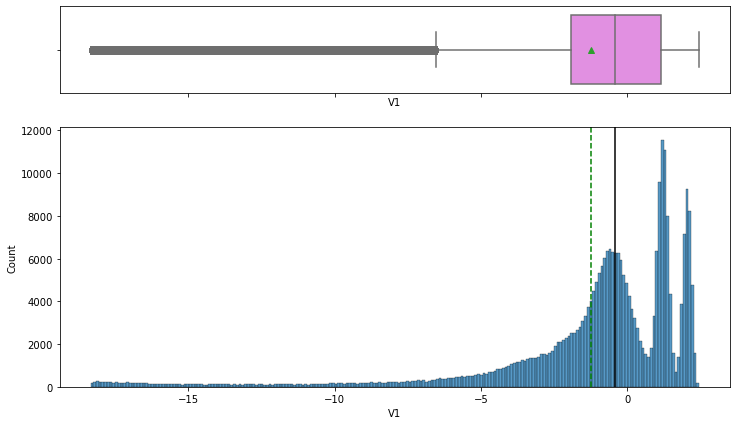

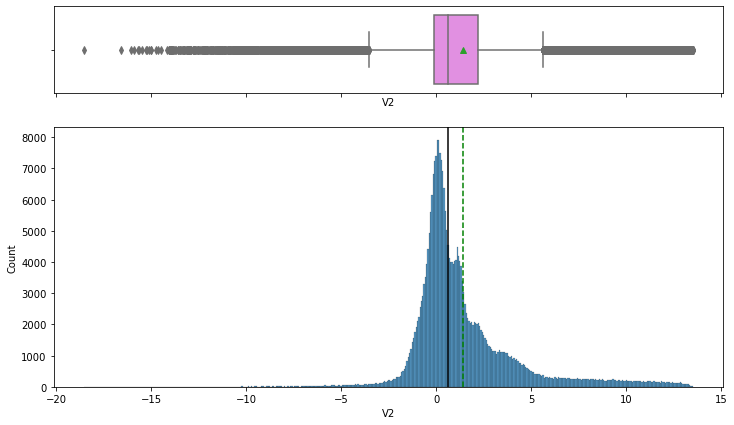

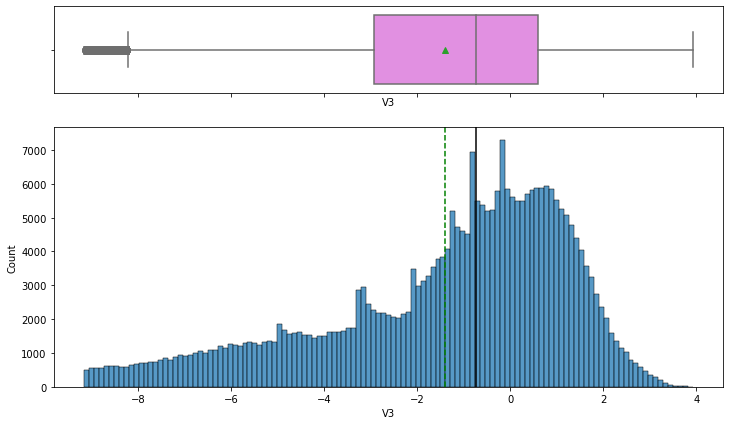

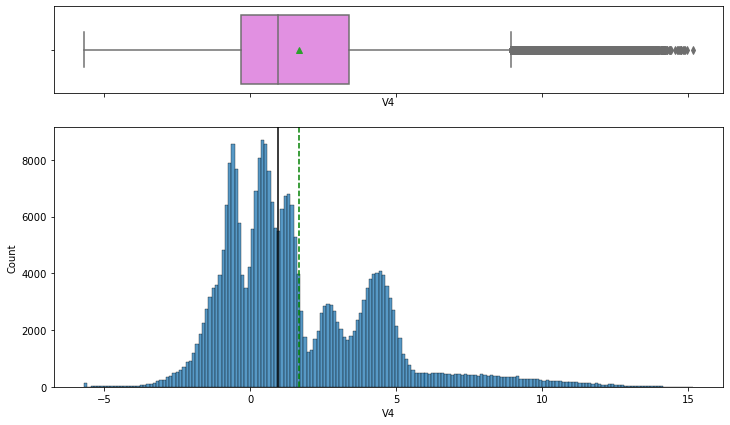

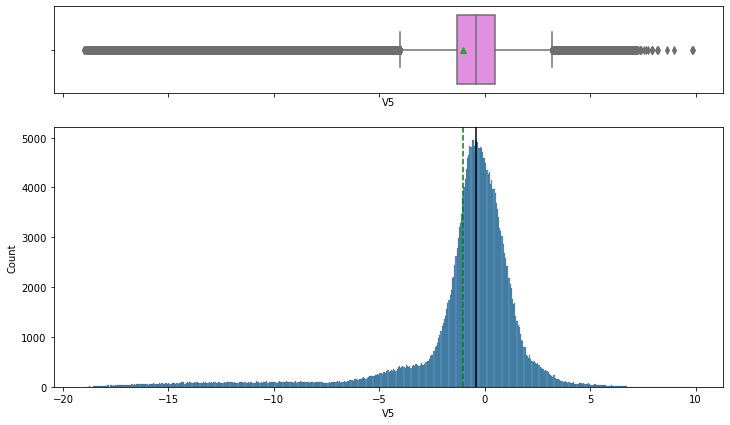

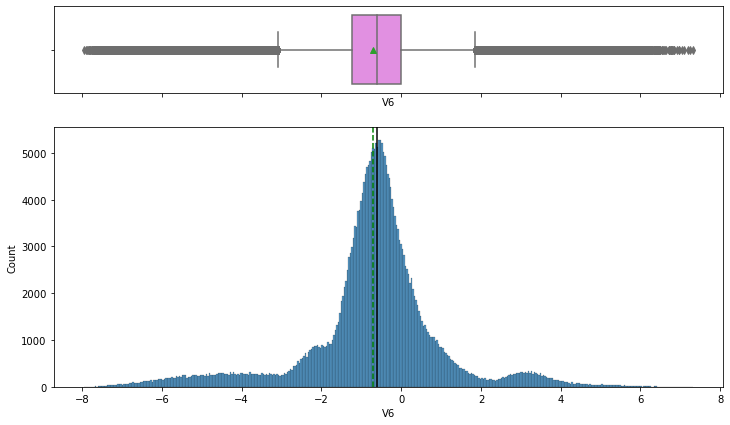

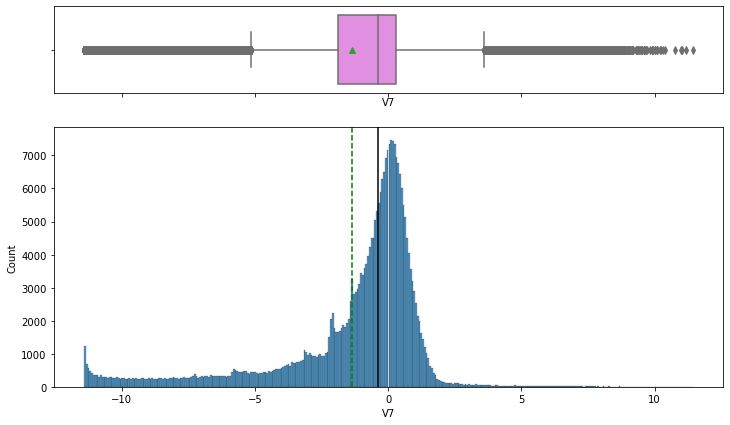

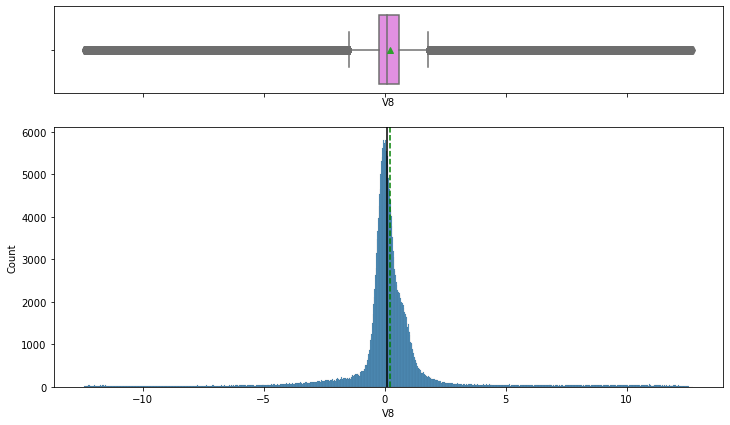

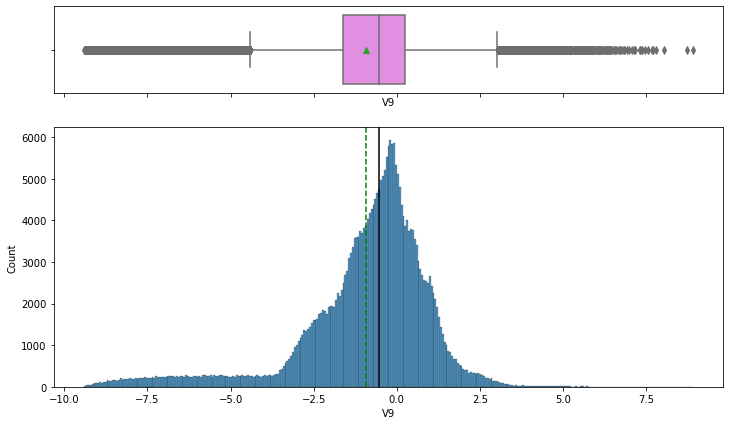

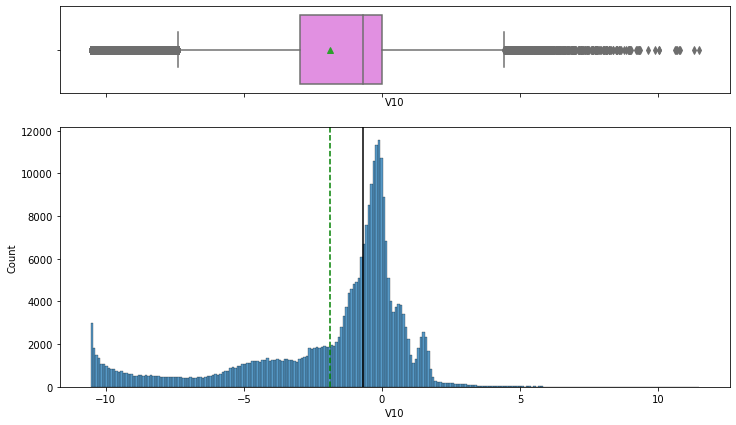

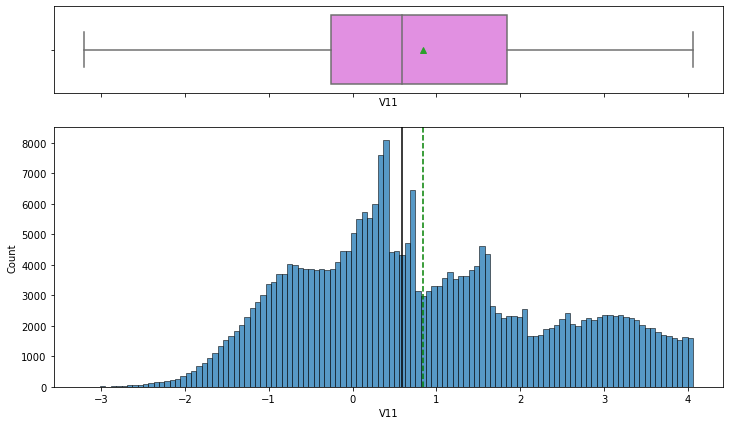

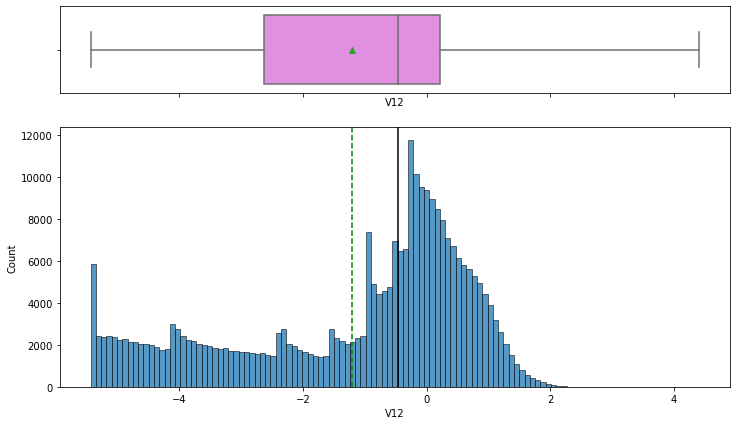

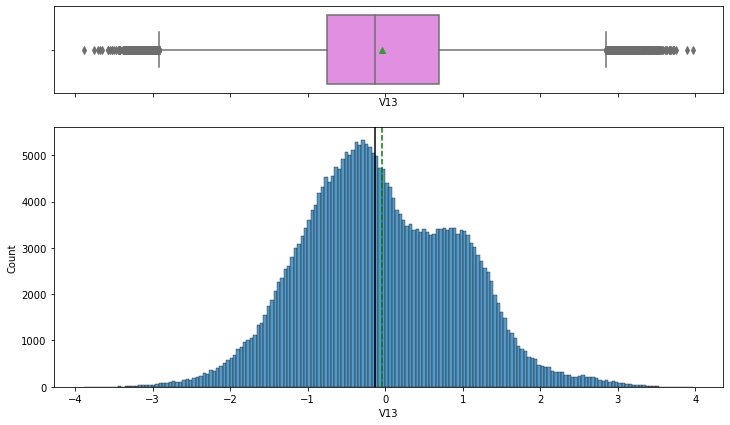

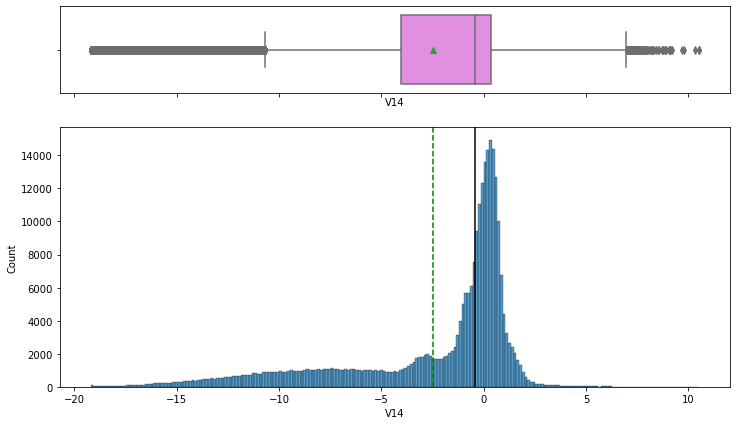

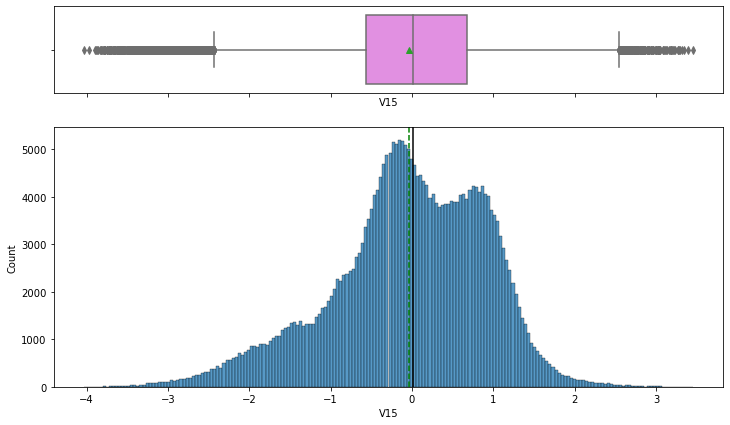

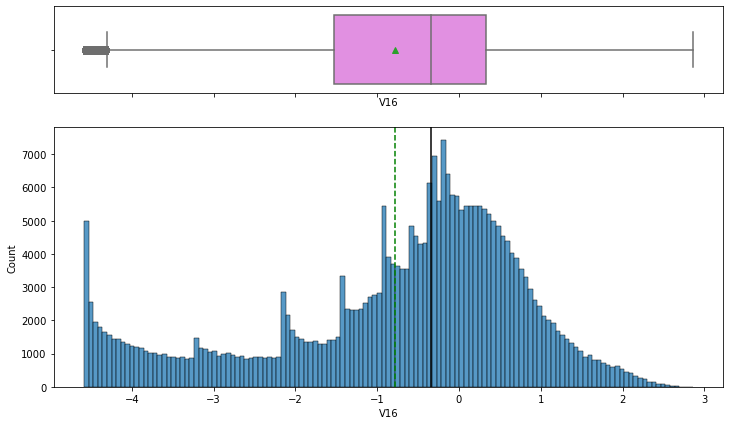

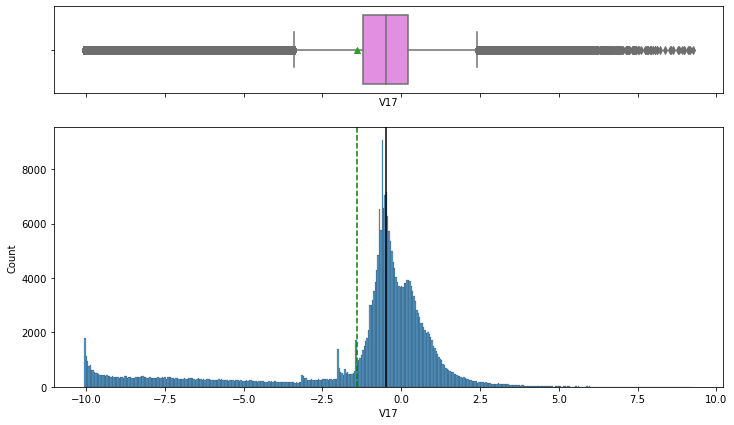

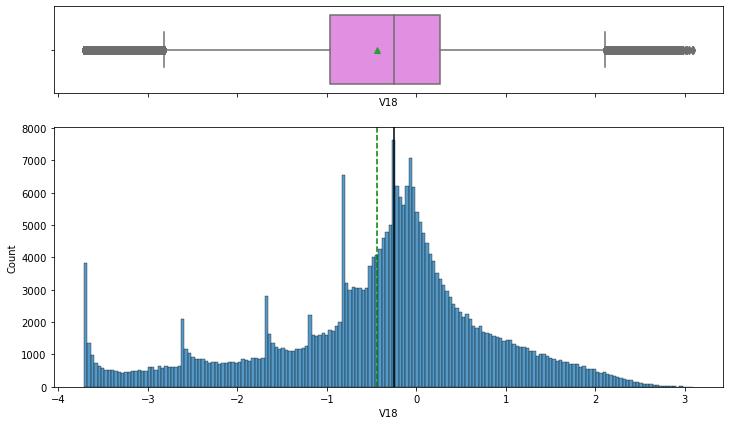

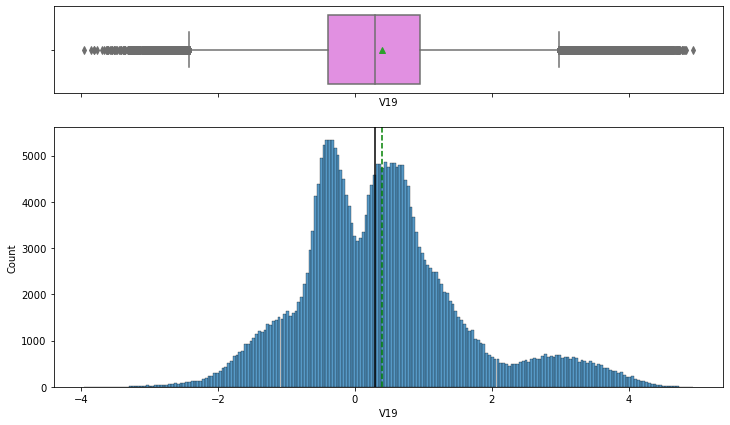

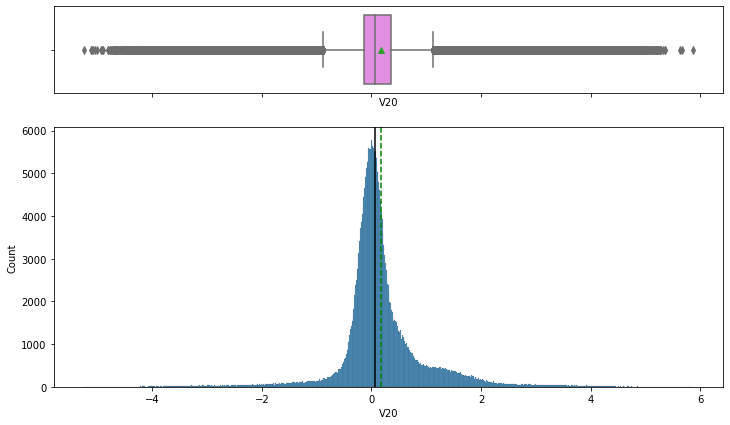

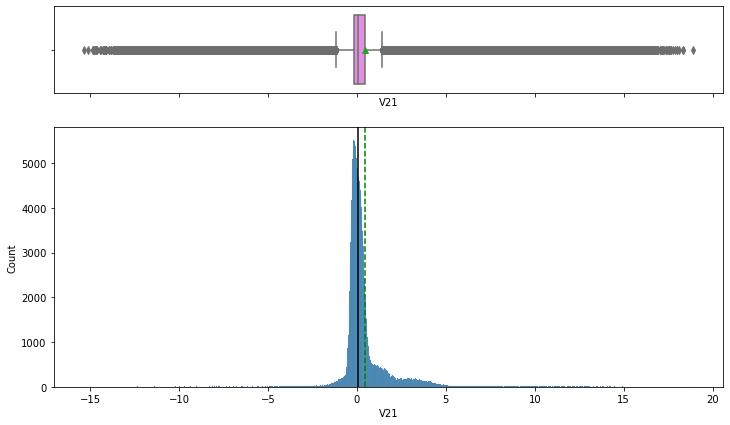

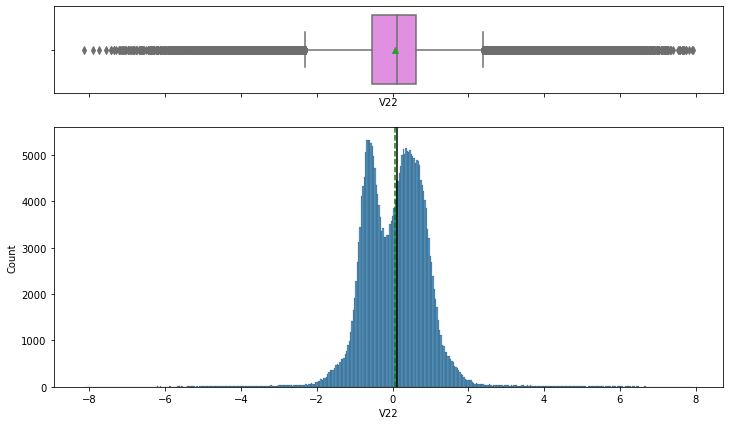

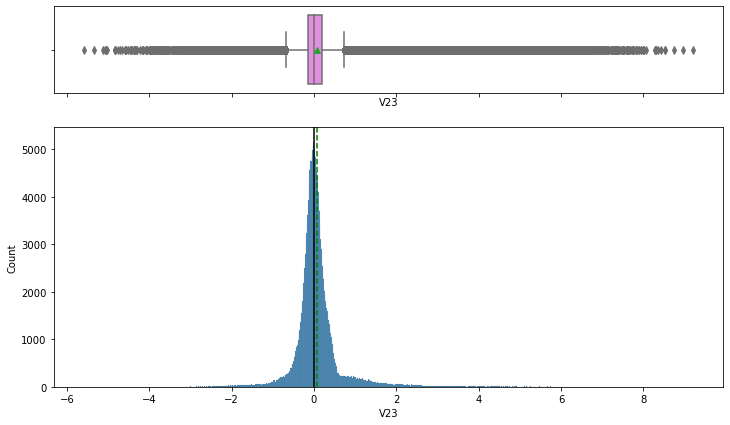

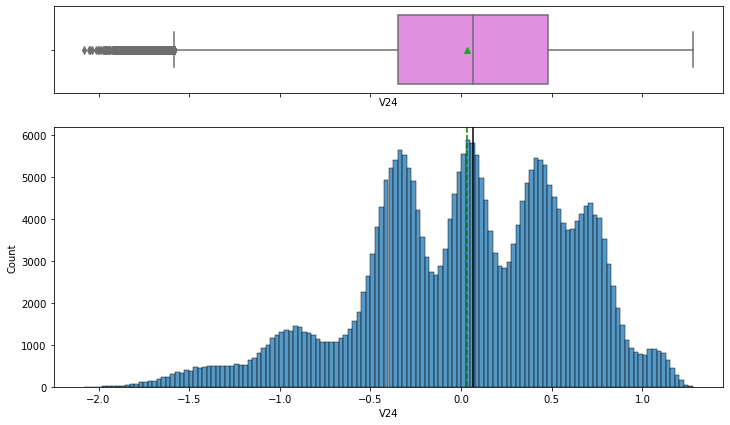

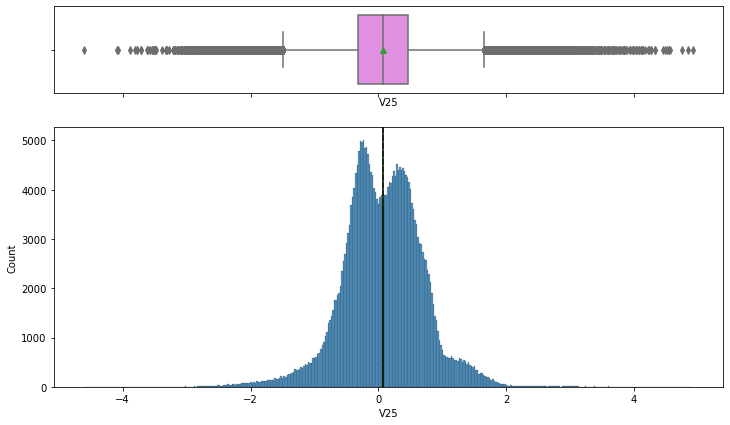

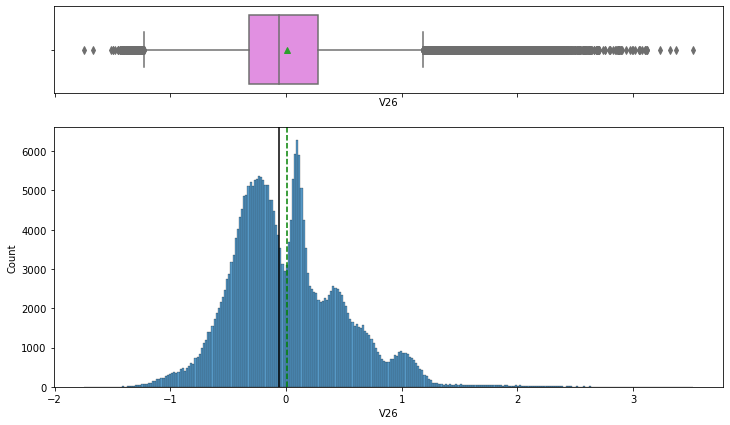

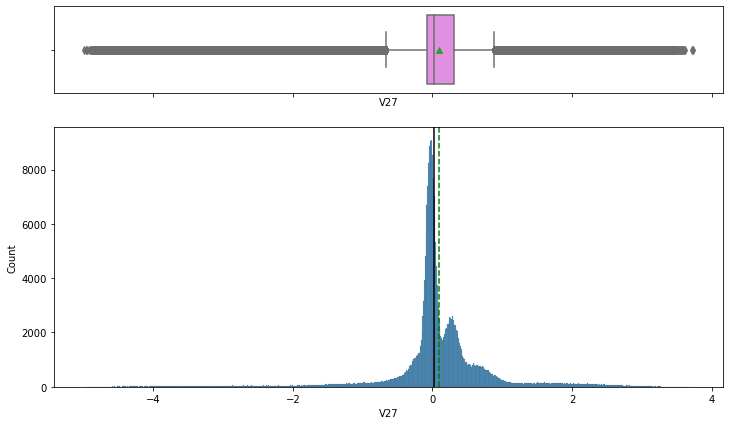

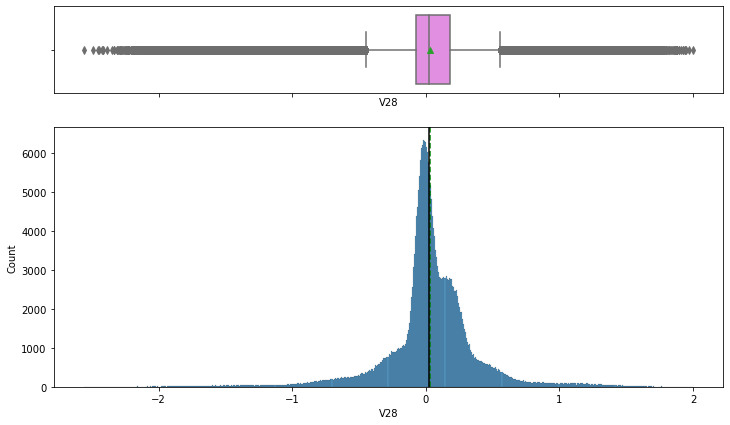

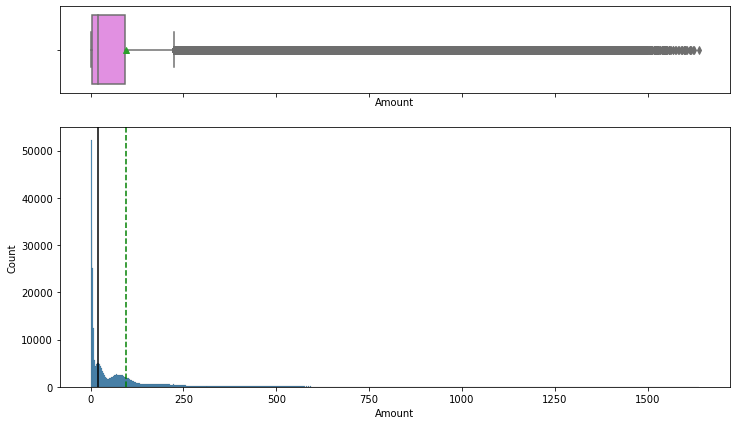

In [10]:
for i in df.columns[:-1]:
    histogram_boxplot(df, i)

In [11]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

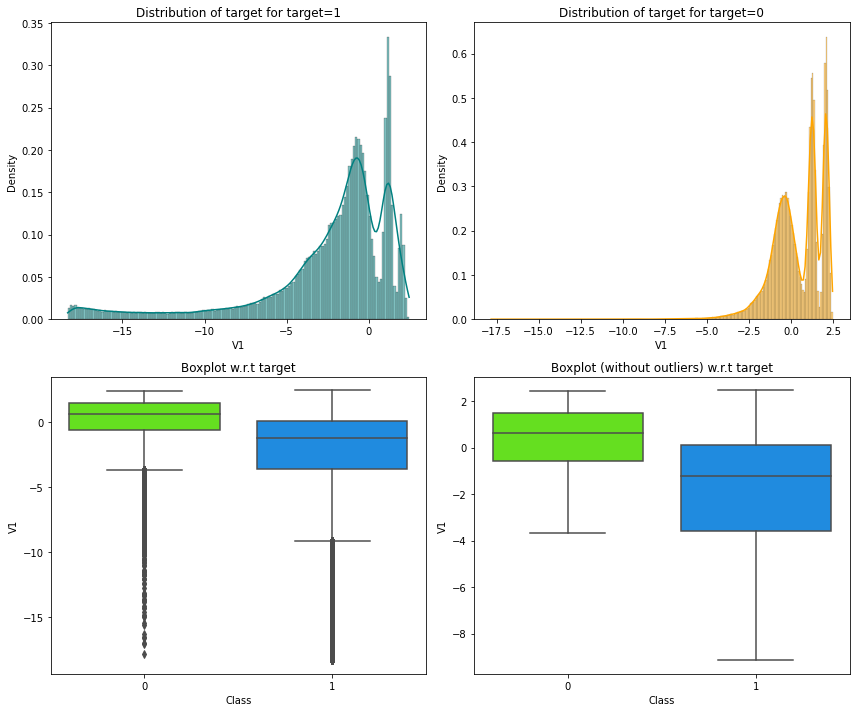

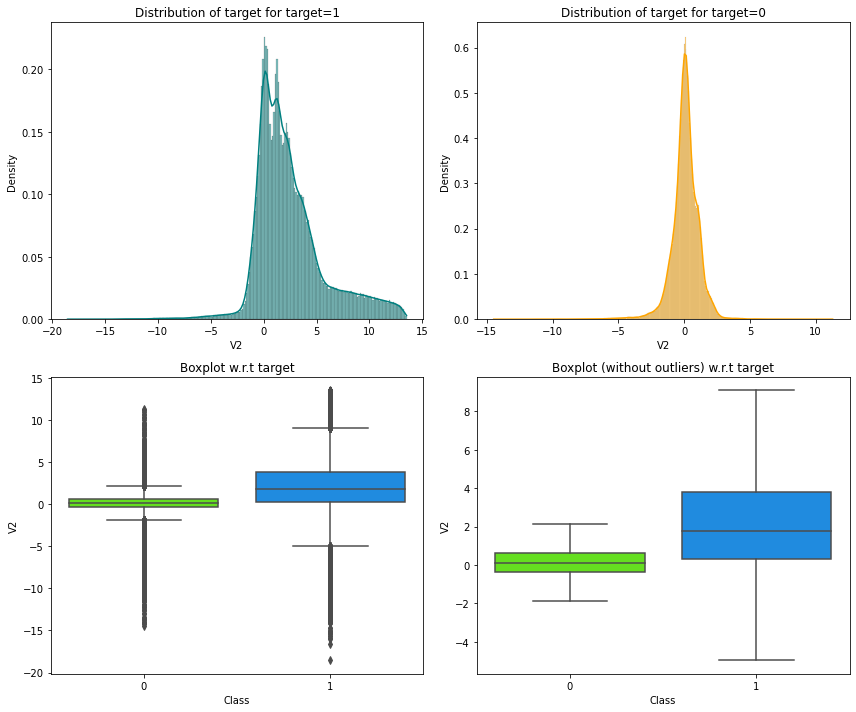

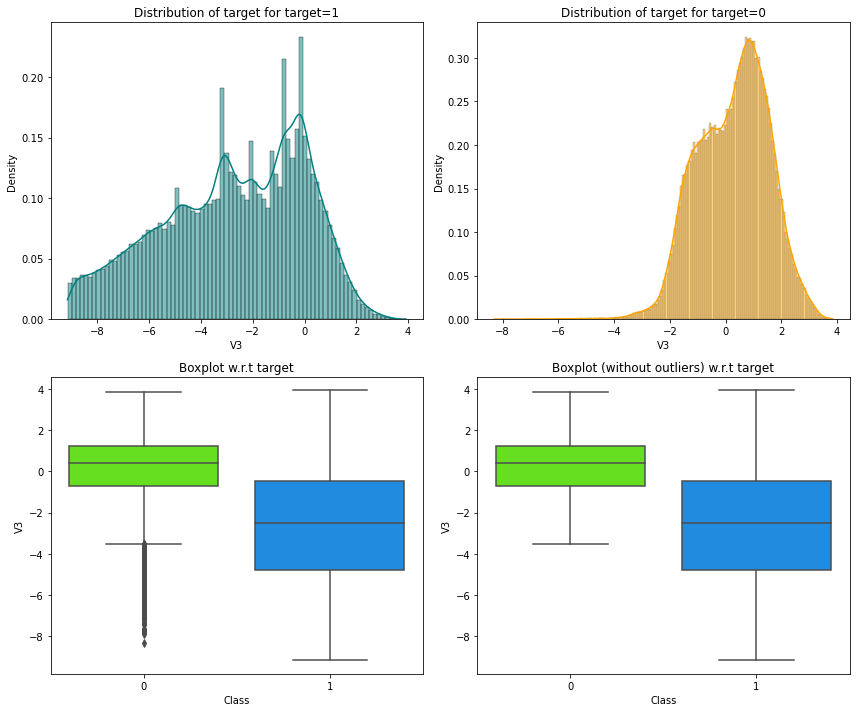

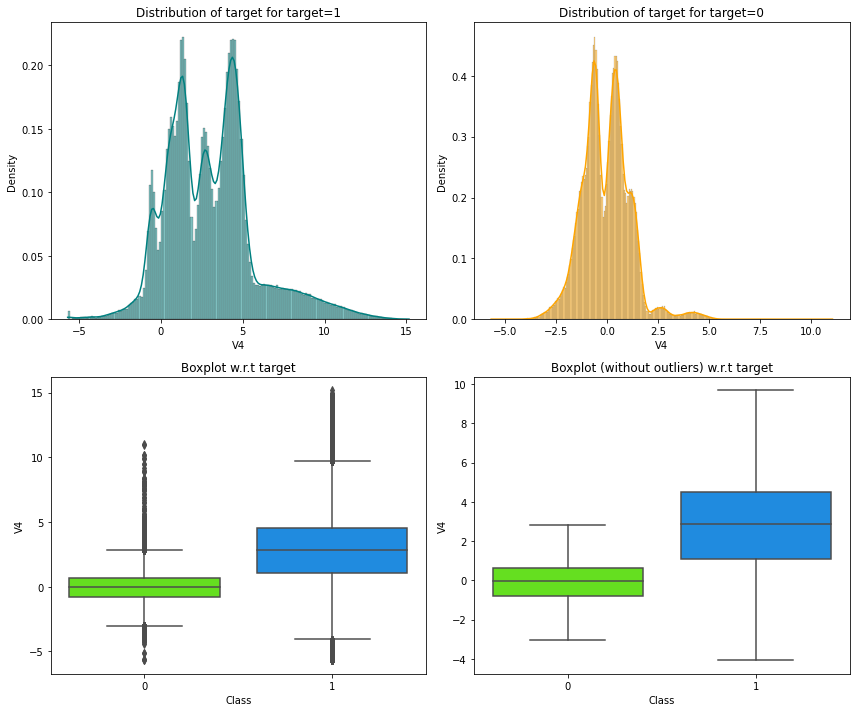

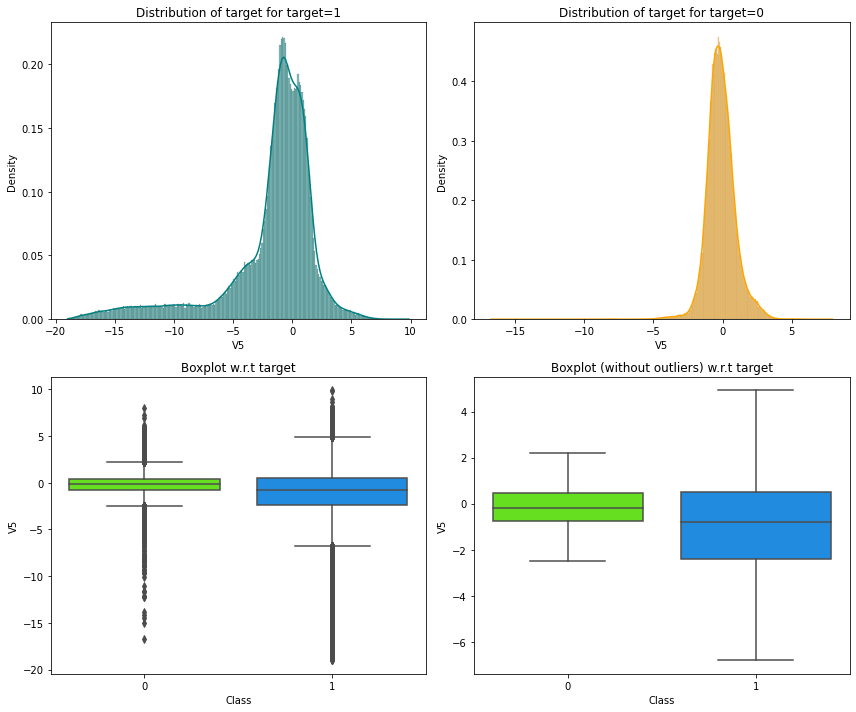

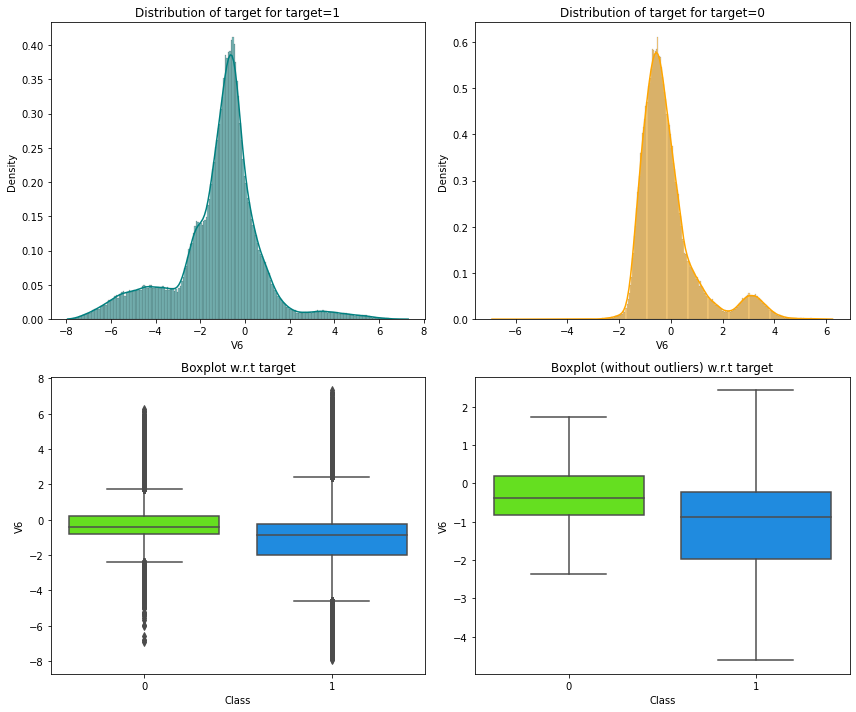

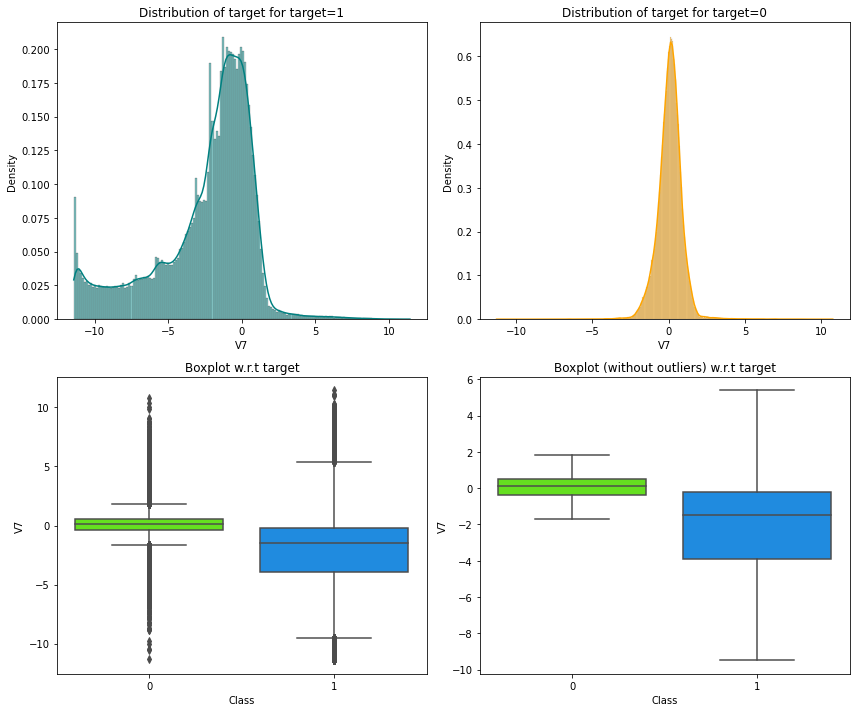

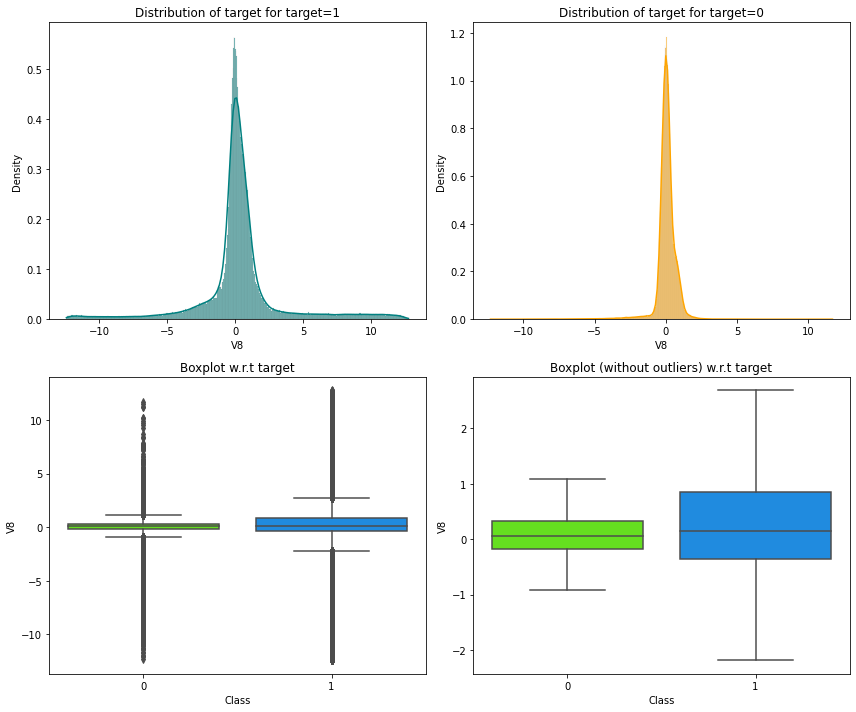

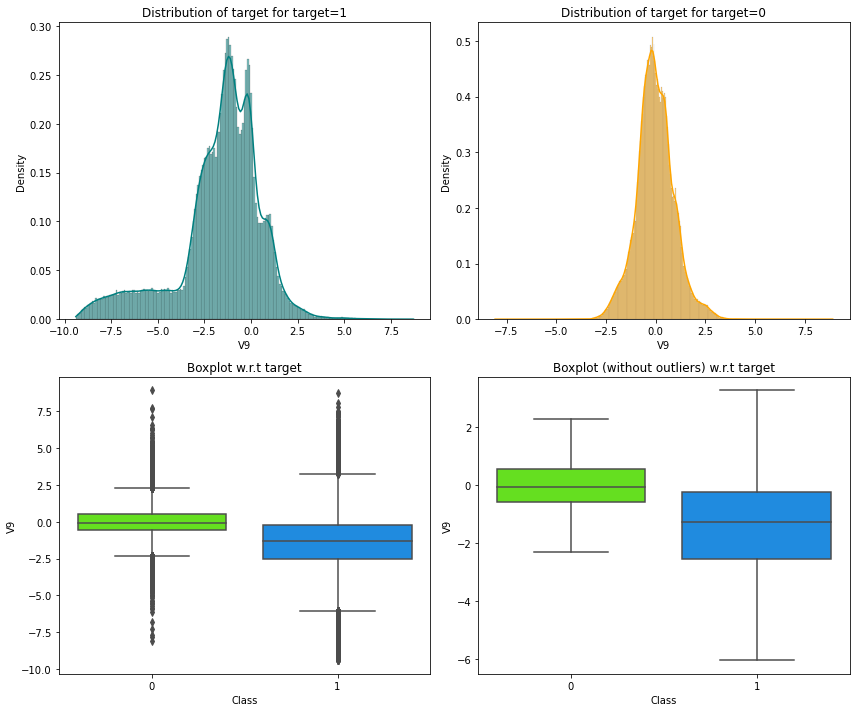

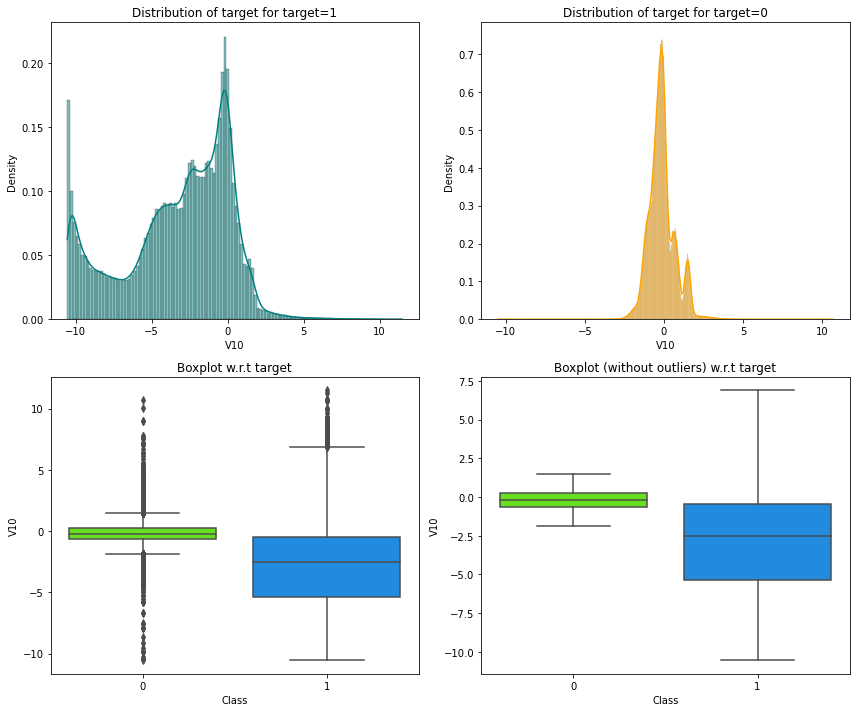

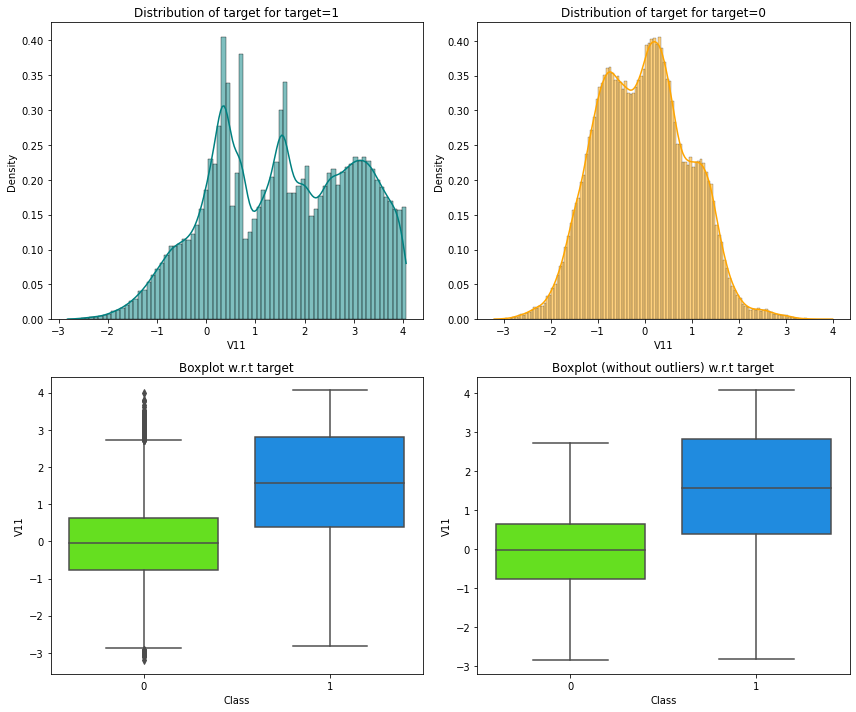

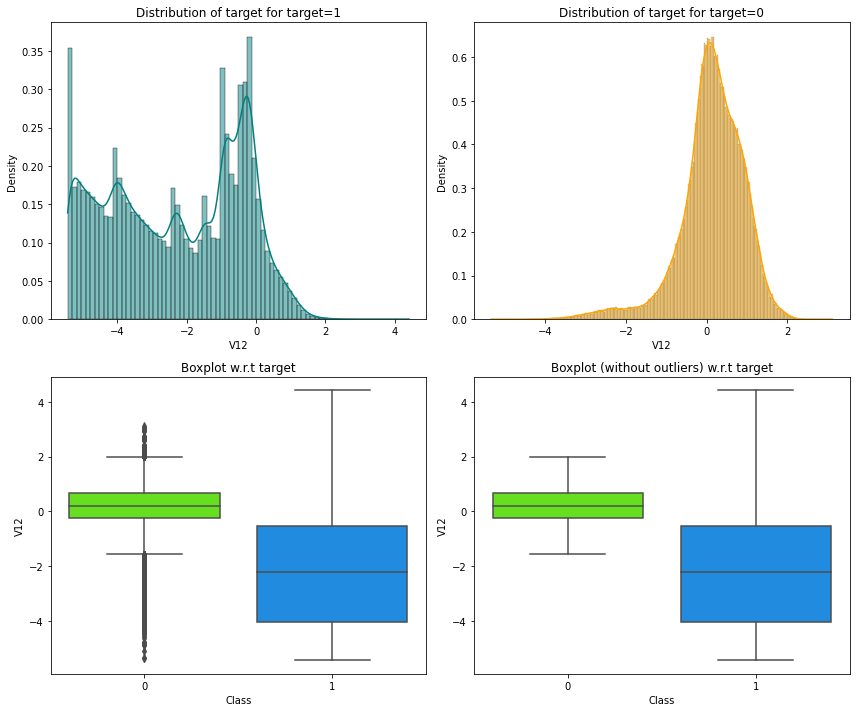

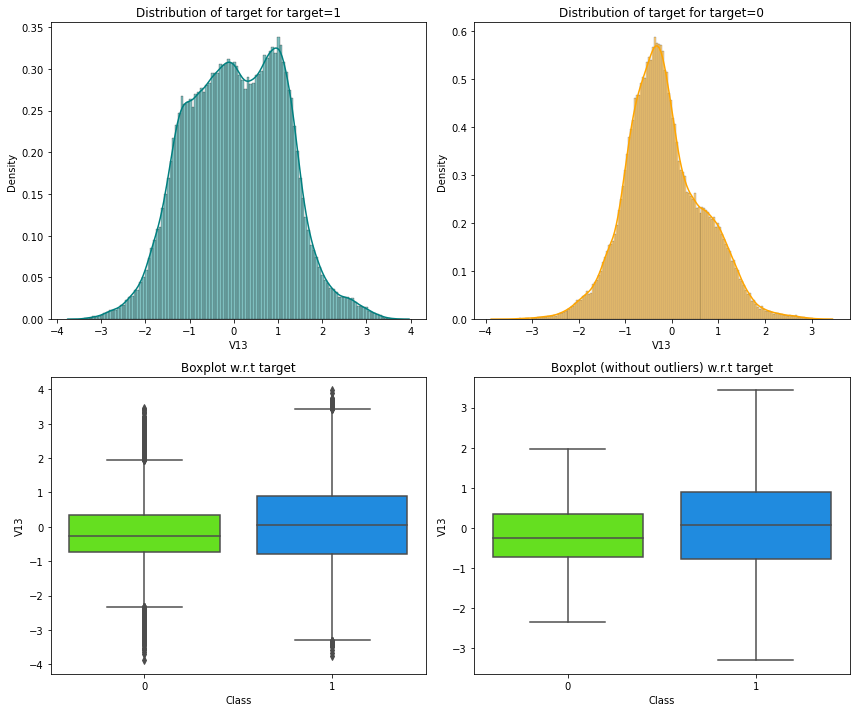

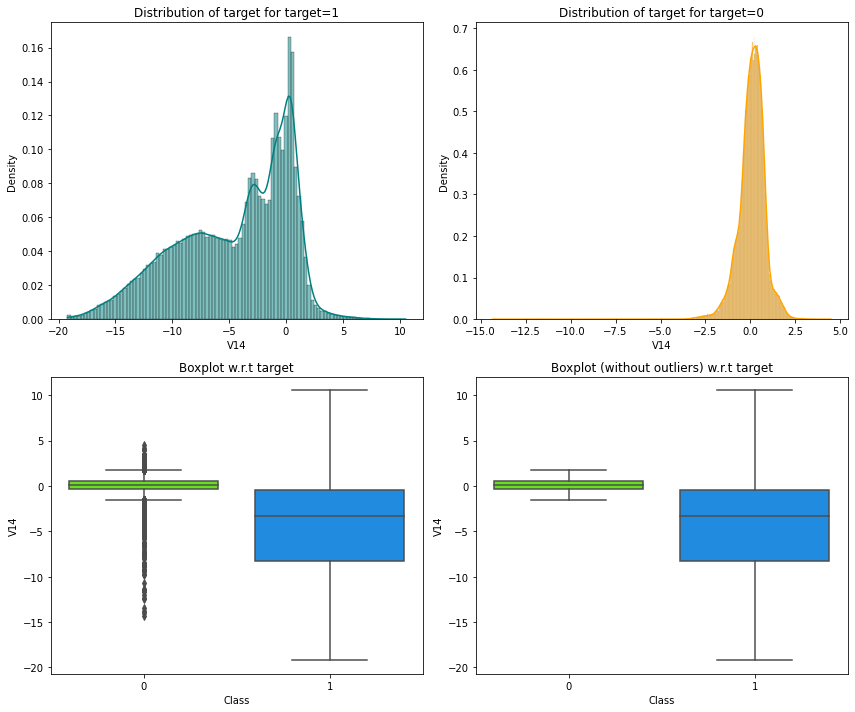

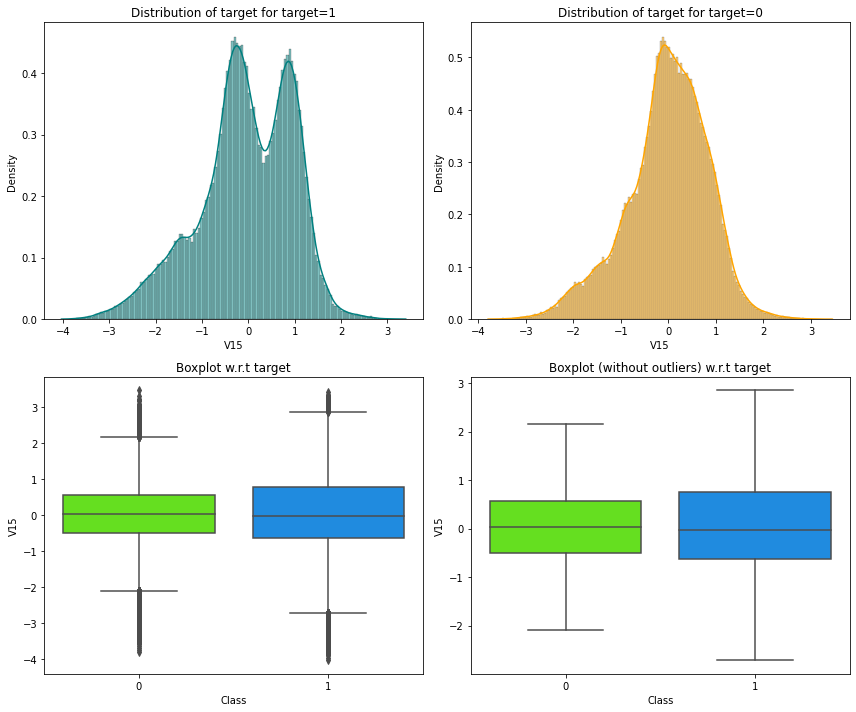

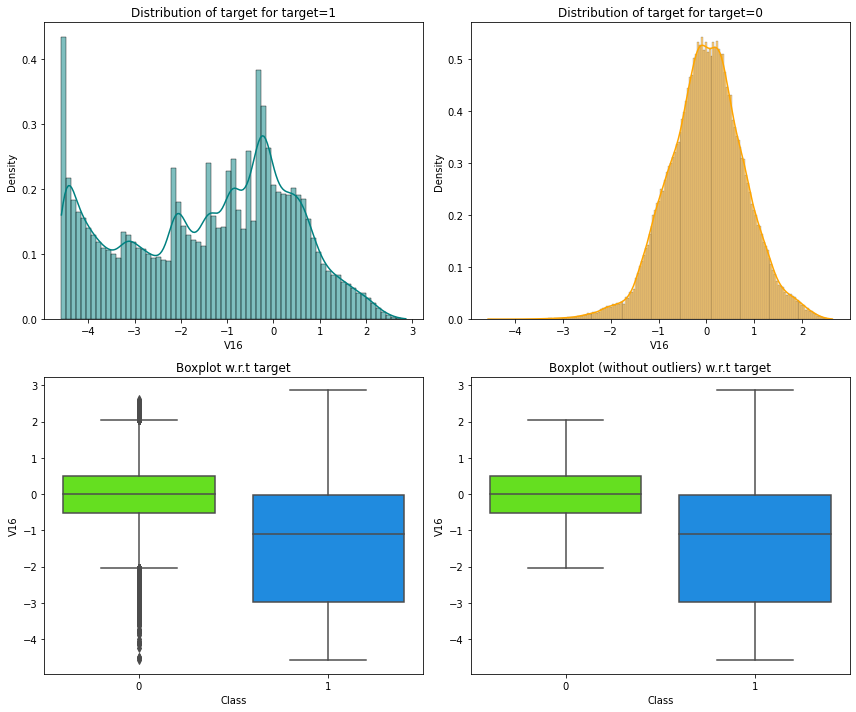

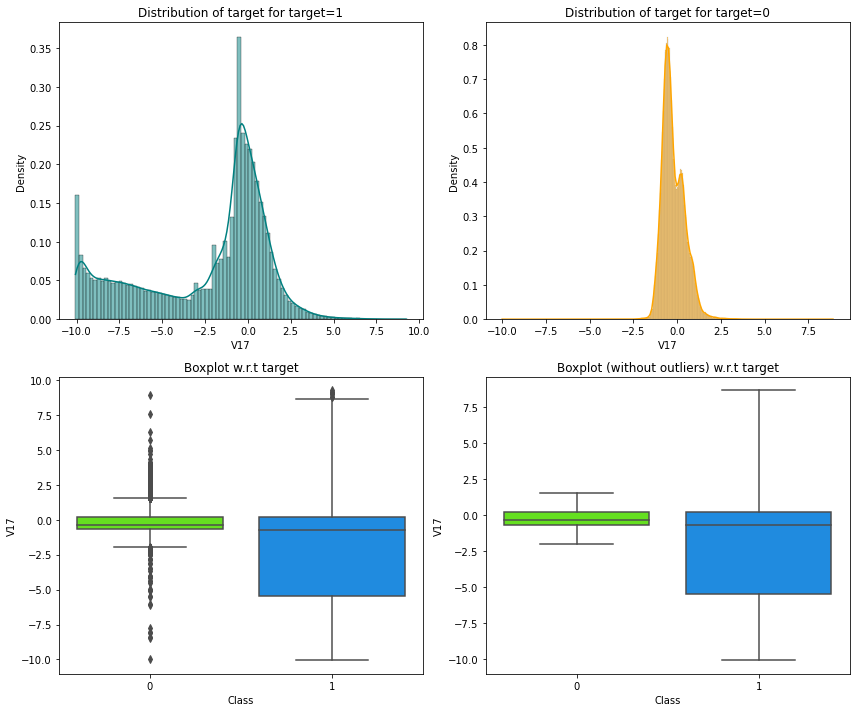

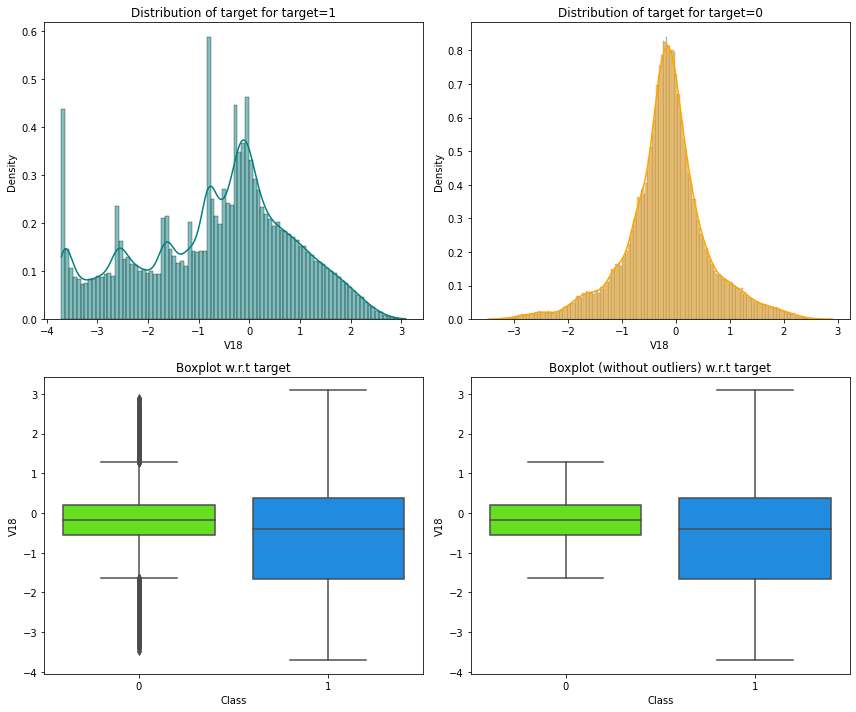

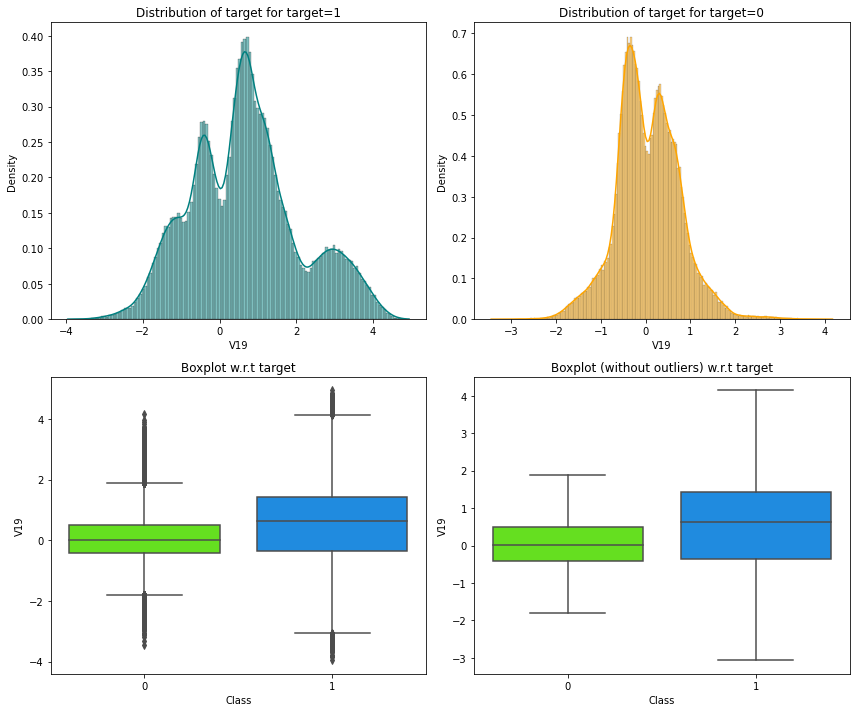

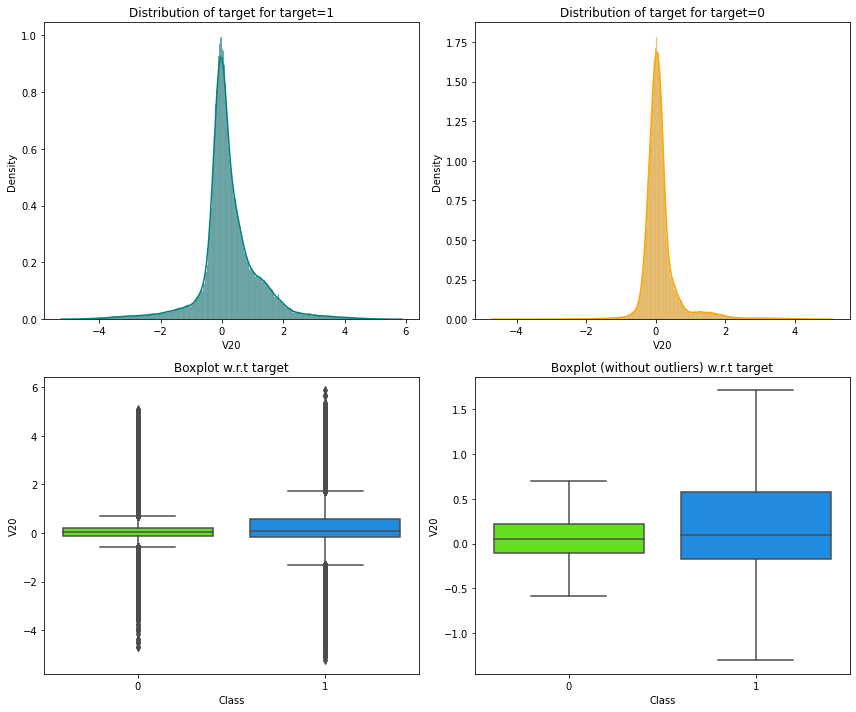

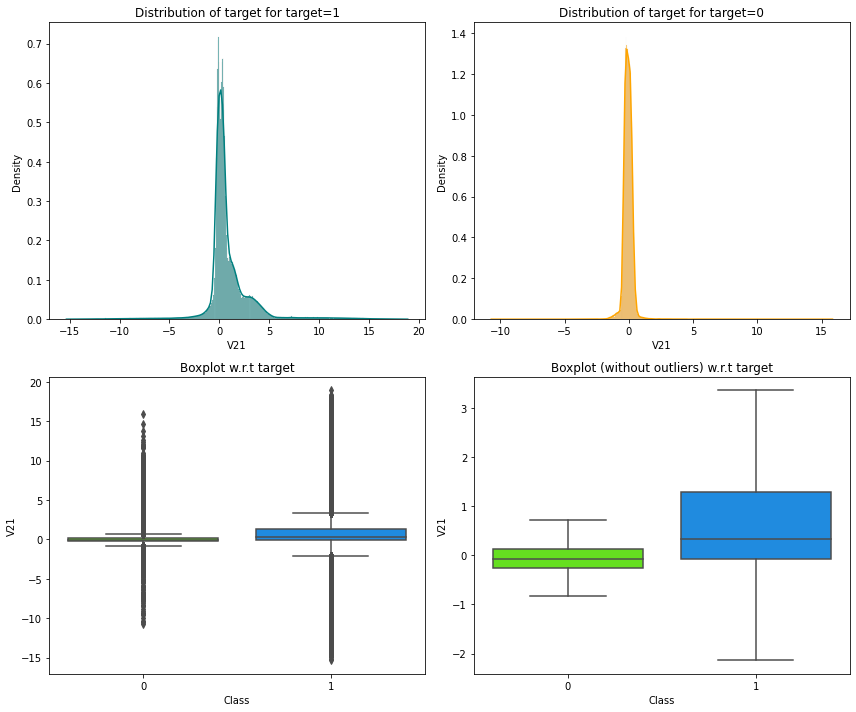

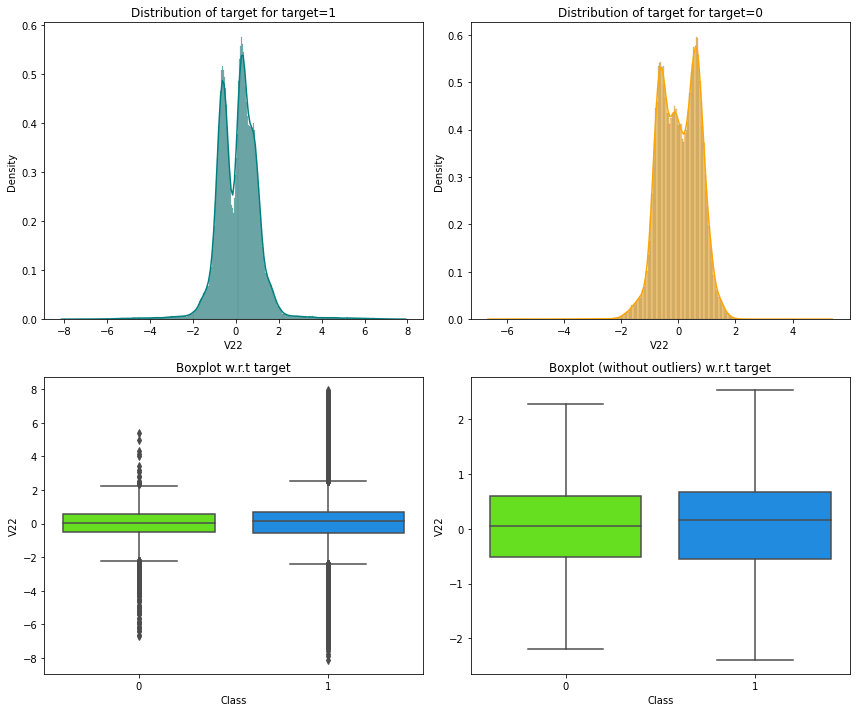

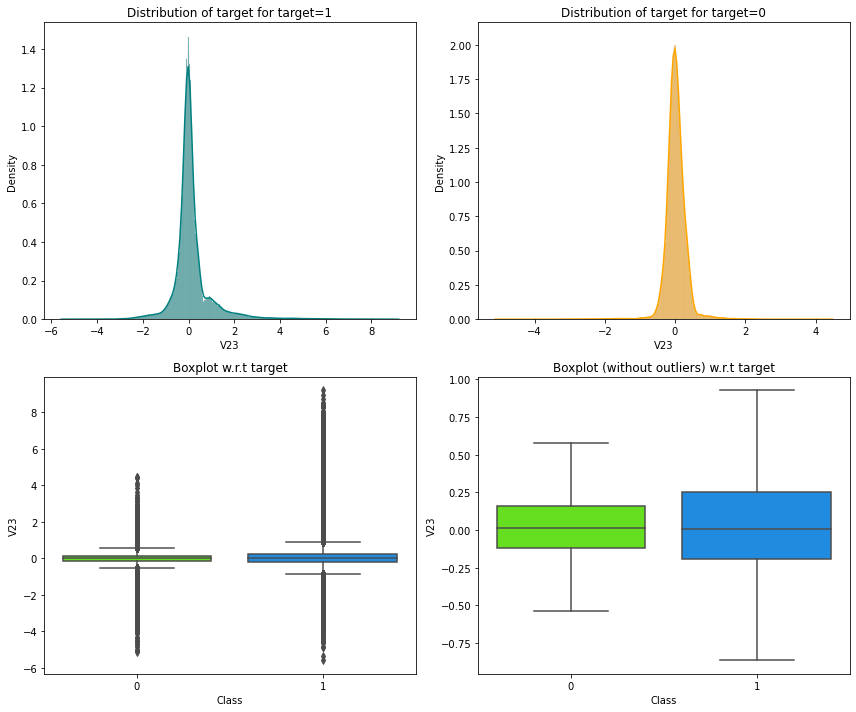

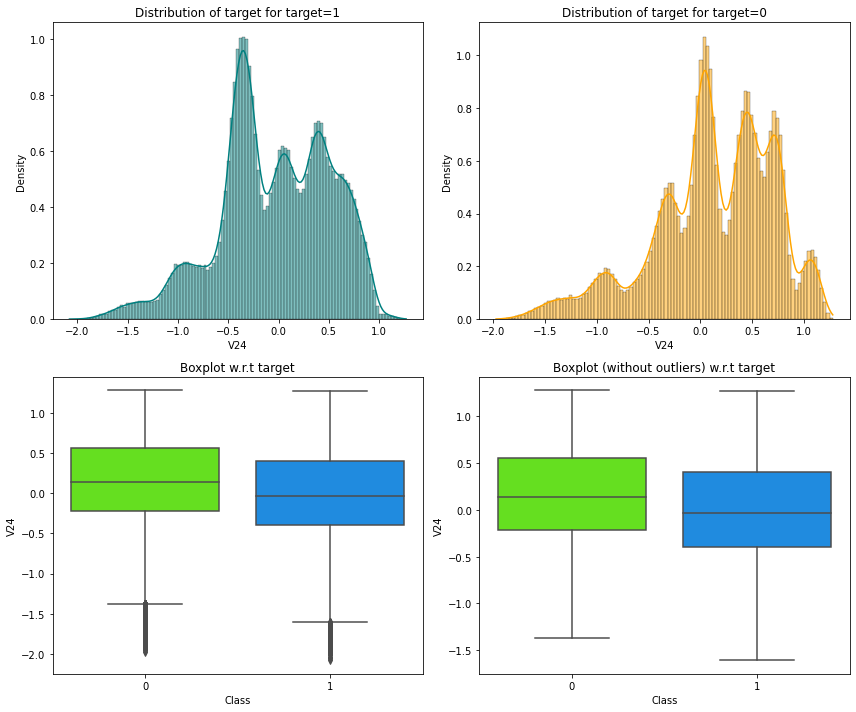

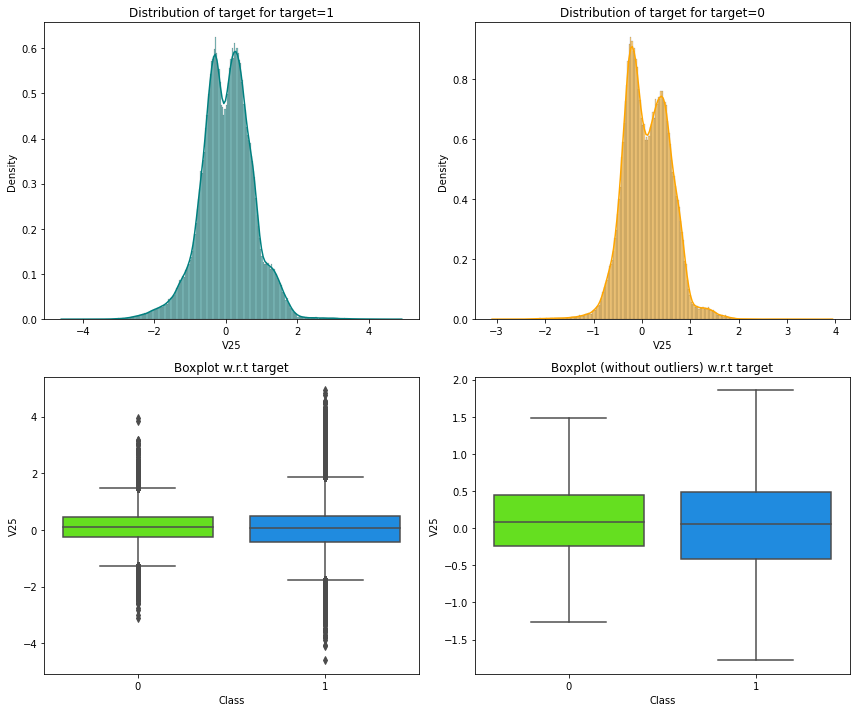

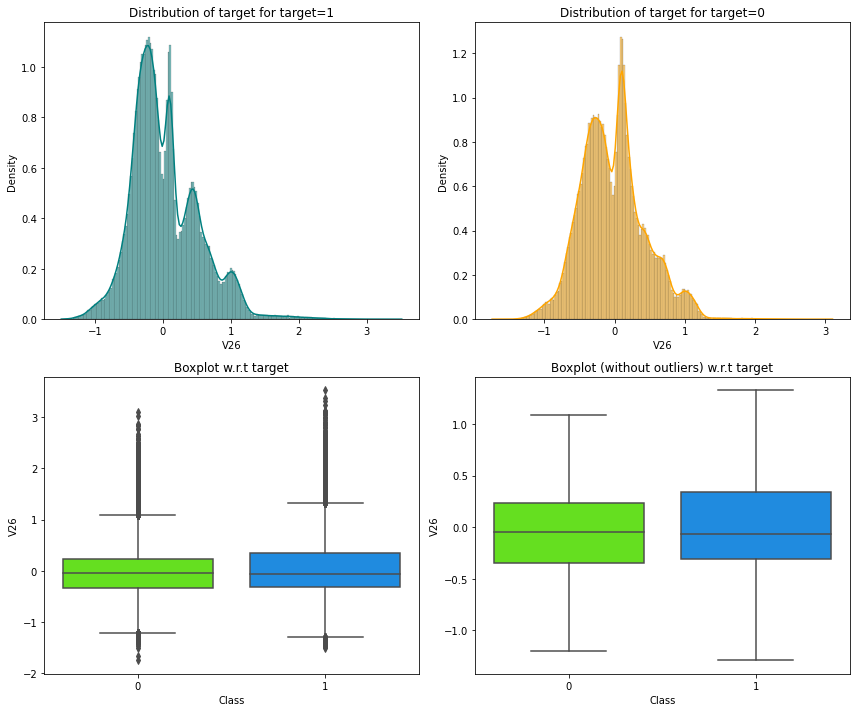

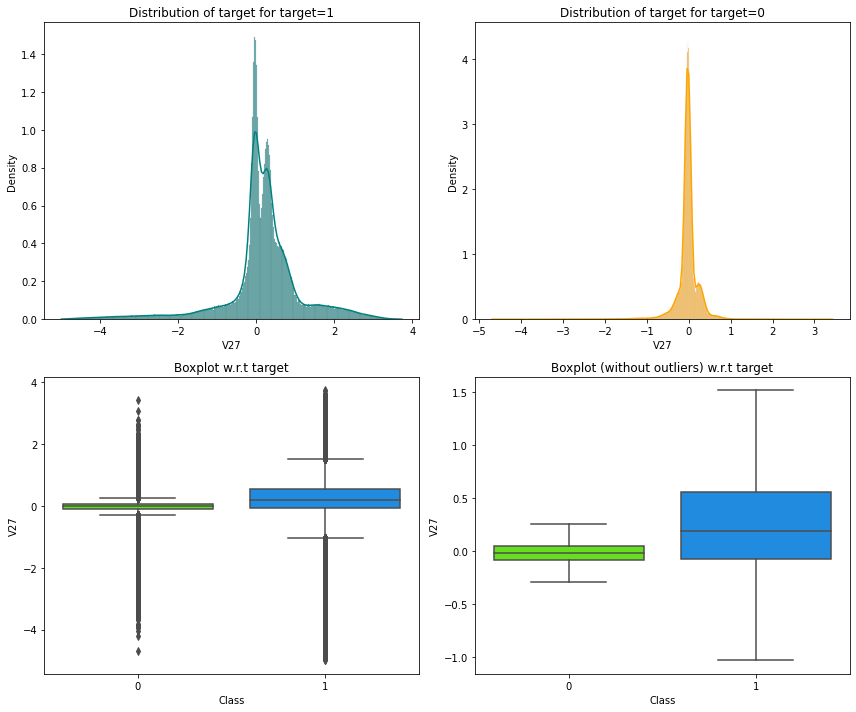

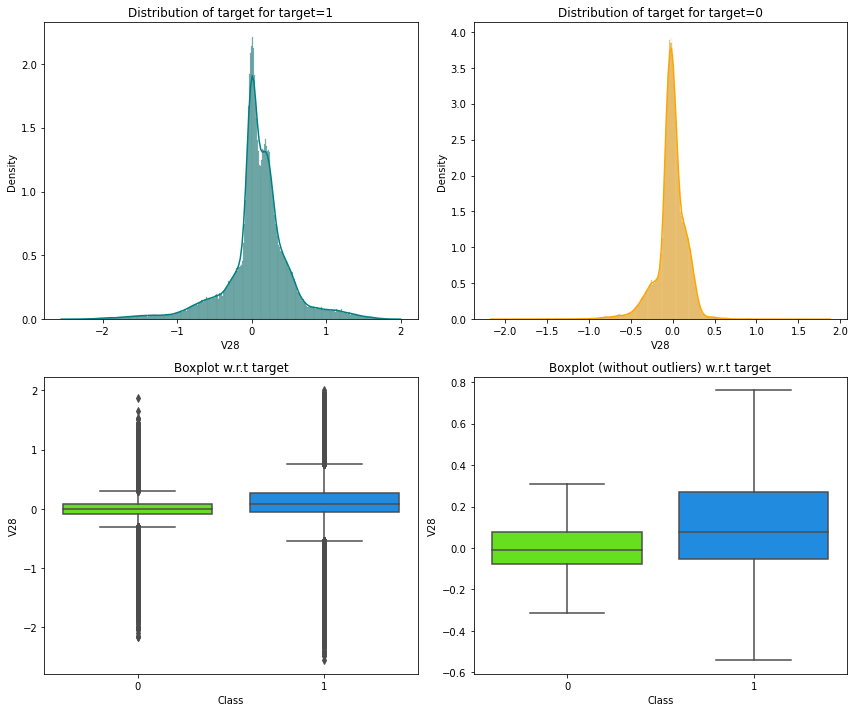

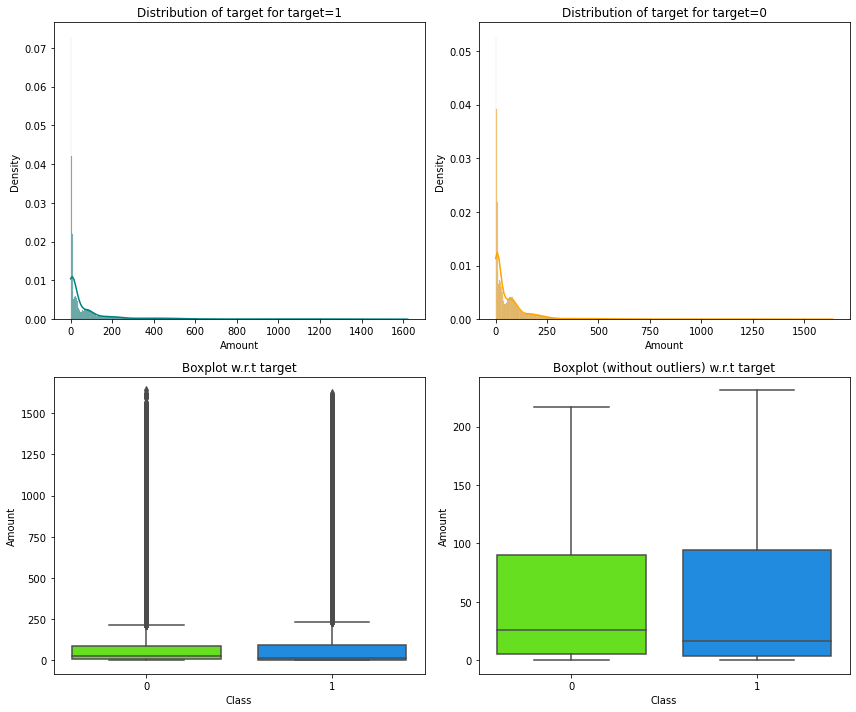

In [12]:
for i in df.columns[:-1]:
    distribution_plot_wrt_target(df, i, "Class")

In [13]:
# seperate class labels and features
X= df.drop("Class",axis=1)
y=df["Class"]

In [14]:
# scaling of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# split the dataset for train and test. We use 70% for training and 30% for the testing.
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.3)



In [16]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    
    
    #y_pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    plt.show()
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

# Machine Learning Models

### SVM Model

In [17]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

#### MODE 1

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.940641,0.926184,0.96492,0.945155


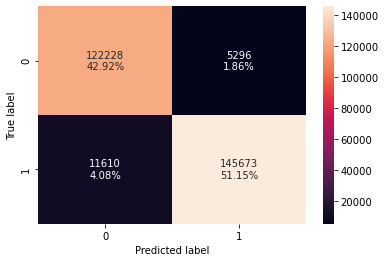

In [18]:
### Initialize the model  
model1 = SVC(kernel="linear")

# train the model
model1.fit(X_scaled,y)

# check performance on train data
svm_perf = model_performance_classification_sklearn(
    model1, X_scaled, y
)  
svm_perf


### MODE 2

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.940922,0.92673,0.964985,0.945471


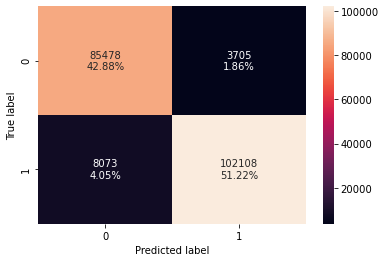

In [20]:
### Initialize the model  
model1 = SVC(kernel="linear")

# train the model
model1.fit(X_train,y_train)

# check performance on train data
svm_train_perf = model_performance_classification_sklearn(
    model1, X_train, y_train
)  
svm_train_perf


<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.940124,0.926139,0.963831,0.944609


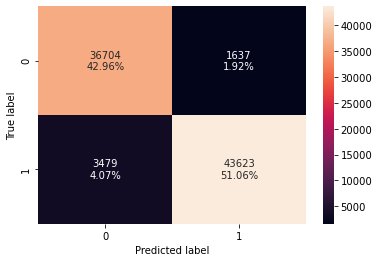

In [21]:
# check performance on test data
svm_test_perf = model_performance_classification_sklearn(
    model1, X_test, y_test
)  
svm_test_perf

### Logistic Regression

### MODE 1

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.940286,0.925631,0.96481,0.944815


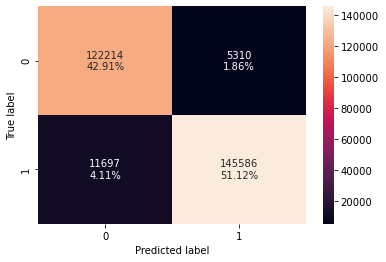

In [22]:
### Initialize the model  
model2 = LogisticRegression()

# train the model
model2.fit(X_scaled,y)

# check performance on train data
lr_perf = model_performance_classification_sklearn(
    model2, X_scaled,y
)  
lr_perf

#### MODE 2

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.940451,0.925804,0.965025,0.945008


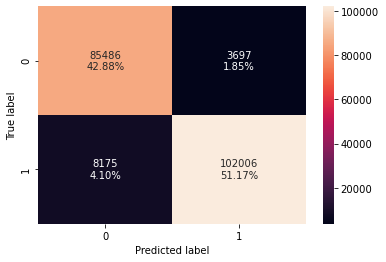

In [23]:
### Initialize the model  
model2 = LogisticRegression()

# train the model
model2.fit(X_train,y_train)

# check performance on train data
lr_train_perf = model_performance_classification_sklearn(
    model2, X_train, y_train
)  
lr_train_perf

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.939656,0.925226,0.963861,0.944148


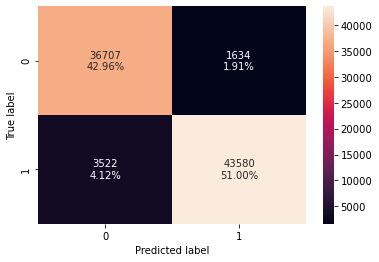

In [24]:
# check performance on train data
lr_test_perf = model_performance_classification_sklearn(
    model2, X_test, y_test
)  
lr_test_perf

### AdaBoost Classifier

#### MODE 1

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.94761,0.936935,0.967171,0.951813


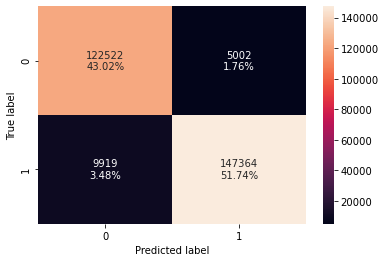

In [25]:
### Initialize the model  
model3 = AdaBoostClassifier(random_state=42)

# train the model
model3.fit(X_scaled,y)

# check performance on train data
adb_perf = model_performance_classification_sklearn(
    model3, X_scaled, y
)  
adb_perf

#### MODE 2

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.947358,0.937748,0.966005,0.951667


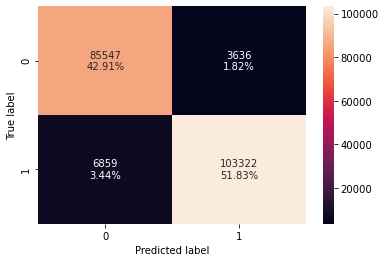

In [26]:
### Initialize the model  
model3 = AdaBoostClassifier(random_state=42)

# train the model
model3.fit(X_train,y_train)

# check performance on train data
adb_train_perf = model_performance_classification_sklearn(
    model3, X_train, y_train
)  
adb_train_perf

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.946011,0.936521,0.964513,0.950311


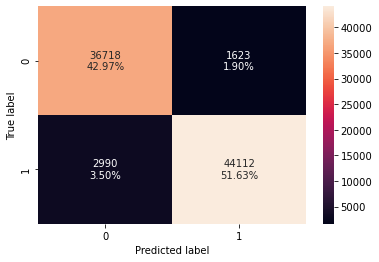

In [27]:
# check performance on train data
adb_test_perf = model_performance_classification_sklearn(
    model3, X_test, y_test
)  
adb_test_perf

### Decision Tree

#### MODE 1

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


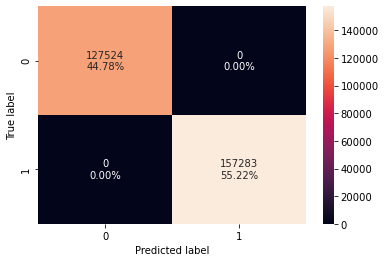

In [28]:
### Initialize the model  
model4 = DecisionTreeClassifier(random_state=42)

# train the model
model4.fit(X_scaled,y)

# check performance on train data
dt_perf = model_performance_classification_sklearn(
    model4, X_scaled, y
)  
dt_perf

#### MODE 2

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


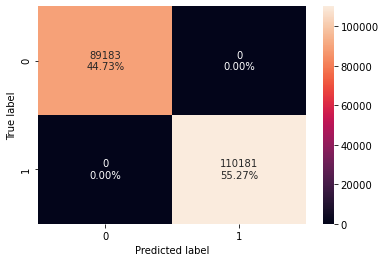

In [29]:
### Initialize the model  
model4 = DecisionTreeClassifier(random_state=42)

# train the model
model4.fit(X_train,y_train)

# check performance on train data
dt_train_perf = model_performance_classification_sklearn(
    model4, X_train, y_train
)  
dt_train_perf

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.916775,0.924122,0.924849,0.924485


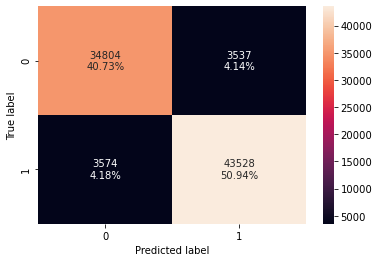

In [30]:
# check performance on train data
dt_test_perf = model_performance_classification_sklearn(
    model4, X_test, y_test
)  
dt_test_perf

### Random Forest Model

#### MODE 1

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.999961,0.999949,0.999981,0.999965


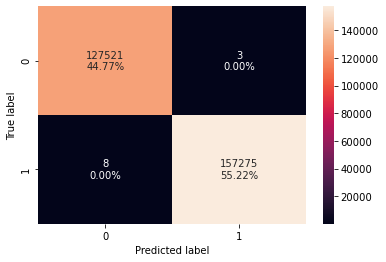

In [31]:
### Initialize the model  
model5 = RandomForestClassifier(random_state=42)

# train the model
model5.fit(X_scaled,y)

# check performance on train data
rf_perf = model_performance_classification_sklearn(
    model5, X_scaled, y
)  
rf_perf

#### MODE 2

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.999955,0.999946,0.999973,0.999959


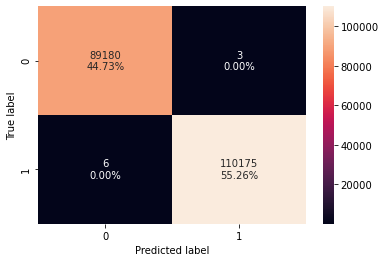

In [32]:
### Initialize the model  
model5 = RandomForestClassifier(random_state=42)

# train the model
model5.fit(X_train,y_train)

# check performance on train data
rf_train_perf = model_performance_classification_sklearn(
    model5, X_train, y_train
)  
rf_train_perf

<Figure size 432x288 with 0 Axes>

,Accuracy,Recall,Precision,F1
0,0.9537,0.947539,0.967799,0.957562


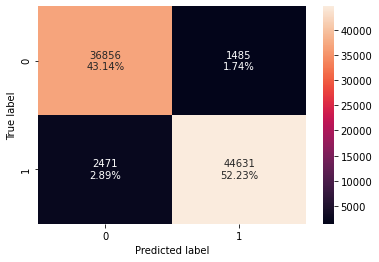

In [33]:
# check performance on train data
rf_test_perf = model_performance_classification_sklearn(
    model5, X_test, y_test
)  
rf_test_perf

# Feature Importance

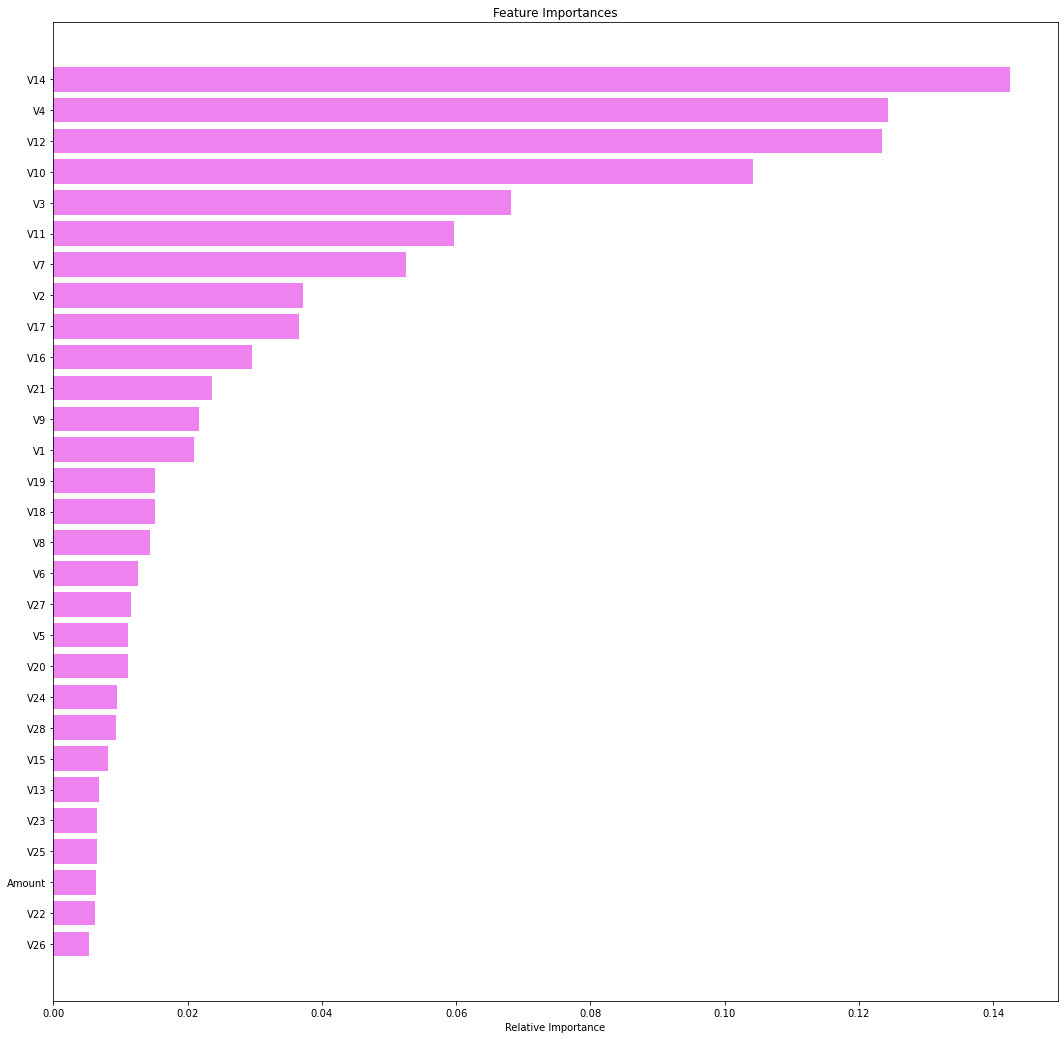

In [34]:
feature_names = X.columns
importances = (
    model5.feature_importances_
)  ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## MODEL COMPARISION

In [35]:
# MODE 1 performance comparison

models_comp_df = pd.concat(
    [svm_perf.T, lr_perf.T,adb_perf.T, dt_perf.T ,rf_perf.T], axis=1,
)
models_comp_df.columns = [
    "SVM ",
    "Logistic ",
    "Adaboost ",
    "Decision Tree ",
    "Random Forest ",
]
print("Training performance comparison:")
models_comp_df

Training performance comparison:


,SVM,Logistic,Adaboost,Decision Tree,Random Forest
Accuracy,0.940641,0.940286,0.947610,1.0,0.999961
Recall,0.926184,0.925631,0.936935,1.0,0.999949
Precision,0.964920,0.964810,0.967171,1.0,0.999981
F1,0.945155,0.944815,0.951813,1.0,0.999965


### MODE 2

In [36]:
# training performance comparison

models_train_comp_df = pd.concat(
    [svm_train_perf.T, lr_train_perf.T,adb_train_perf.T, dt_train_perf.T ,rf_train_perf.T], axis=1,
)
models_train_comp_df.columns = [
    "SVM ",
    "Logistic ",
    "Adaboost ",
    "Decision Tree ",
    "Random Forest ",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,SVM,Logistic,Adaboost,Decision Tree,Random Forest
Accuracy,0.940922,0.940451,0.947358,1.0,0.999955
Recall,0.926730,0.925804,0.937748,1.0,0.999946
Precision,0.964985,0.965025,0.966005,1.0,0.999973
F1,0.945471,0.945008,0.951667,1.0,0.999959


In [37]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [svm_test_perf.T,  lr_test_perf.T,adb_test_perf.T,dt_test_perf.T, rf_test_perf.T,], axis=1,
)
models_test_comp_df.columns = [
    "SVM ",
    "Logistic Regression ",
    "Adaboost",
    "Decision Tree",
    "Random Forest",
]
print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,SVM,Logistic Regression,Adaboost,Decision Tree,Random Forest
Accuracy,0.940124,0.939656,0.946011,0.916775,0.953700
Recall,0.926139,0.925226,0.936521,0.924122,0.947539
Precision,0.963831,0.963861,0.964513,0.924849,0.967799
F1,0.944609,0.944148,0.950311,0.924485,0.957562


### Observations:
- We observe that the Random forest perform better as compared to the other models.
- The F1 score of Random Forest on the test data is higher as compared to other models. 